In [278]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('data/train.csv')

In [3]:
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Analysing correlation between `home`, `destination`, `transport` status

In [274]:
hpdata = pd.concat([
    dataset[dataset['Transported'] == True][['HomePlanet']].dropna().reset_index(drop=True).value_counts(), 
    dataset[dataset['Transported'] == False][['HomePlanet']].dropna().reset_index(drop=True).value_counts()
], axis=1)
hpdata.rename({0: 'Transported', 1: 'Not Transported'}, axis=1, inplace=True)
hpdata.reset_index(level=0, inplace=True)
hpdata['Percentage Transported'] = hpdata['Transported'] / (hpdata['Not Transported'] + hpdata['Transported'])
hpdata

,HomePlanet,Transported,Not Transported,Percentage Transported
0,Earth,1951,2651,0.423946
1,Europa,1404,727,0.658846
2,Mars,920,839,0.523024


<AxesSubplot:xlabel='HomePlanet'>

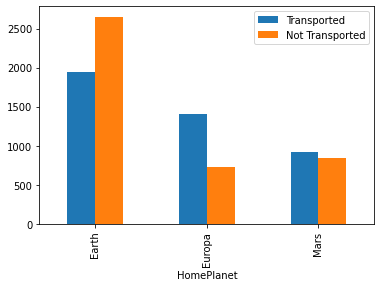

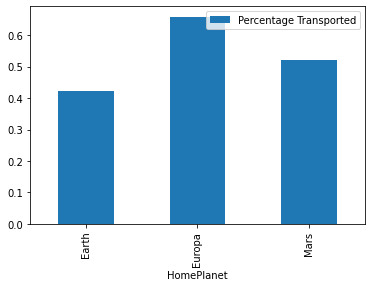

In [275]:
hpdata.plot(x='HomePlanet', y=['Transported', 'Not Transported'], kind='bar')
hpdata.plot(x='HomePlanet', y=['Percentage Transported'], kind='bar')

In [276]:
destdata = pd.concat([
    dataset[dataset['Transported'] == True][['Destination']].dropna().reset_index(drop=True).value_counts(), 
    dataset[dataset['Transported'] == False][['Destination']].dropna().reset_index(drop=True).value_counts()
], axis=1)
destdata.rename({0: 'Transported', 1: 'Not Transported'}, axis=1, inplace=True)
destdata.reset_index(level=0, inplace=True)
destdata['Percentage Transported'] = destdata['Transported'] / (destdata['Not Transported'] + destdata['Transported'])
destdata

,Destination,Transported,Not Transported,Percentage Transported
0,TRAPPIST-1e,2787,3128,0.471175
1,55 Cancri e,1098,702,0.610000
2,PSO J318.5-22,401,395,0.503769


<AxesSubplot:xlabel='Destination'>

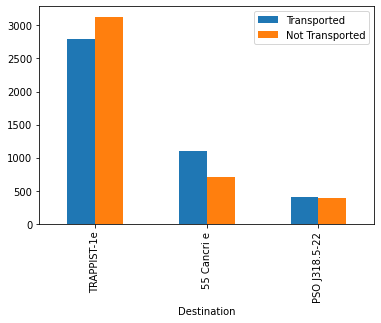

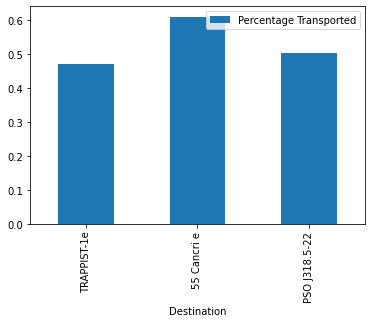

In [277]:
destdata.plot(x='Destination', y=['Transported', 'Not Transported'], kind='bar')
destdata.plot(x='Destination', y=['Percentage Transported'], kind='bar')

In [279]:
homedest = dataset.groupby(['HomePlanet', 'Destination', 'Transported'], dropna=True)
travel_details = homedest.size().unstack('Transported')
travel_details.rename({False: 'Not Transported', True: 'Transported'}, axis=1, inplace=True)
travel_details.rename_axis(None, axis=1, inplace=True)
travel_details['Percentage Transported'] = travel_details['Transported'] / (travel_details['Not Transported'] + travel_details['Transported'])
travel_details

Not Transported  Transported  Percentage Transported
HomePlanet Destination                                                        
Earth      55 Cancri e                342          348                0.504348
           PSO J318.5-22              357          355                0.498596
           TRAPPIST-1e               1894         1207                0.389229
Europa     55 Cancri e                275          611                0.689616
           PSO J318.5-22                5           14                0.736842
           TRAPPIST-1e                434          755                0.634987
Mars       55 Cancri e                 75          118                0.611399
           PSO J318.5-22               27           22                0.448980
           TRAPPIST-1e                720          755                0.511864

<AxesSubplot:xlabel='HomePlanet,Destination'>

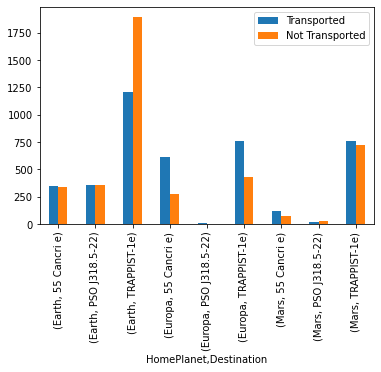

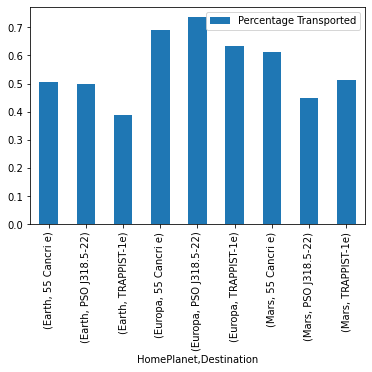

In [273]:
travel_details.plot(y=['Transported', 'Not Transported'], kind='bar')
travel_details.plot(y=['Percentage Transported'], kind='bar')